# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv('Training.csv')

In [3]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
# vals = dataset.values.flatten()

In [5]:
dataset.shape

(4920, 133)

Vérifier les valeurs manquantes

In [19]:
# Vérifier les valeurs manquantes
print(X.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64


# train test split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Supposons que vous avez déjà vos données X et y
# X = ...  # Vos caractéristiques (un tableau NumPy ou une DataFrame Pandas)
# y = ...  # Vos étiquettes (un tableau NumPy ou une série Pandas)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir X_train et X_test en tableaux C-contigus
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Créer un dictionnaire pour stocker les modèles
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB()  # Utiliser GaussianNB au lieu de MultinomialNB
}

# Boucle pour entraîner, tester et afficher les résultats
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Tester le modèle
    predictions = model.predict(X_test)

    # Calculer la précision
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "=" * 40 + "\n")

SVC Accuracy: 1.0000
SVC Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 39,  0, ...,  0,  0,  0],
 [ 0,  0, 41, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 36,  0,  0],
 [ 0,  0,  0, ...,  0, 37,  0],
 [ 0,  0,  0, ...,  0,  0, 39]]


RandomForest Accuracy: 1.0000
RandomForest Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 39,  0, ...,  0,  0,  0],
 [ 0,  0, 41, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 36,  0,  0],
 [ 0,  0,  0, ...,  0, 37,  0],
 [ 0,  0,  0, ...,  0,  0, 39]]


GradientBoosting Accuracy: 1.0000
GradientBoosting Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 39,  0, ...,  0,  0,  0],
 [ 0,  0, 41, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 36,  0,  0],
 [ 0,  0,  0, ...,  0, 37,  0],
 [ 0,  0,  0, ...,  0,  0, 39]]


KNeighbors Accuracy: 1.0000
KNeighbors Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 39,  0, ...,  0,  0,  0],
 [ 0,  0, 41, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 36,  0,  0],
 [ 0,  0,  0, ...,  0, 37,  0],
 [ 0

1. Vérifier les données

In [9]:
# Vérifier les doublons
print("Nombre de doublons dans X :", X.duplicated().sum())

# Vérifier les valeurs manquantes
print("Valeurs manquantes dans X :", X.isnull().sum().sum())

Nombre de doublons dans X : 4616
Valeurs manquantes dans X : 0


Cela vous permettra de voir toutes les lignes qui ont des doublons, y compris la première occurrence.

In [10]:
# Afficher toutes les occurrences des lignes dupliquées (y compris la première)
doublons_tous = X[X.duplicated(keep=False)]
print("Toutes les occurrences des lignes dupliquées :")
print(doublons_tous)

Toutes les occurrences des lignes dupliquées :
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0     

In [13]:
# Identifier les doublons dans X
doublons_indices = X[X.duplicated(keep=False)].index

# Afficher les noms des maladies (prognosis) pour les doublons
noms_maladies_doublons = y[doublons_indices]

print("Noms des maladies pour les lignes dupliquées :")
print(noms_maladies_doublons)

Noms des maladies pour les lignes dupliquées :
0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object


In [14]:
# Identifier les doublons dans X
doublons_indices = X[X.duplicated(keep=False)].index

# Extraire les noms des maladies (prognosis) pour les doublons
noms_maladies_doublons = y[doublons_indices]

# Afficher les noms des maladies uniques
noms_maladies_uniques = noms_maladies_doublons.unique()

print("Noms des maladies uniques parmi les doublons :")
print(noms_maladies_uniques)


Noms des maladies uniques parmi les doublons :
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [16]:
# Compter le nombre de maladies uniques
nombre_maladies_uniques = y.nunique()

print("Nombre de maladies uniques AVEC DOUBLONS:", nombre_maladies_uniques)

Nombre de maladies uniques AVEC DOUBLONS: 41


2. Analyser la distribution des classes

In [17]:
import pandas as pd

# Afficher la distribution des classes
print(pd.Series(y).value_counts())

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

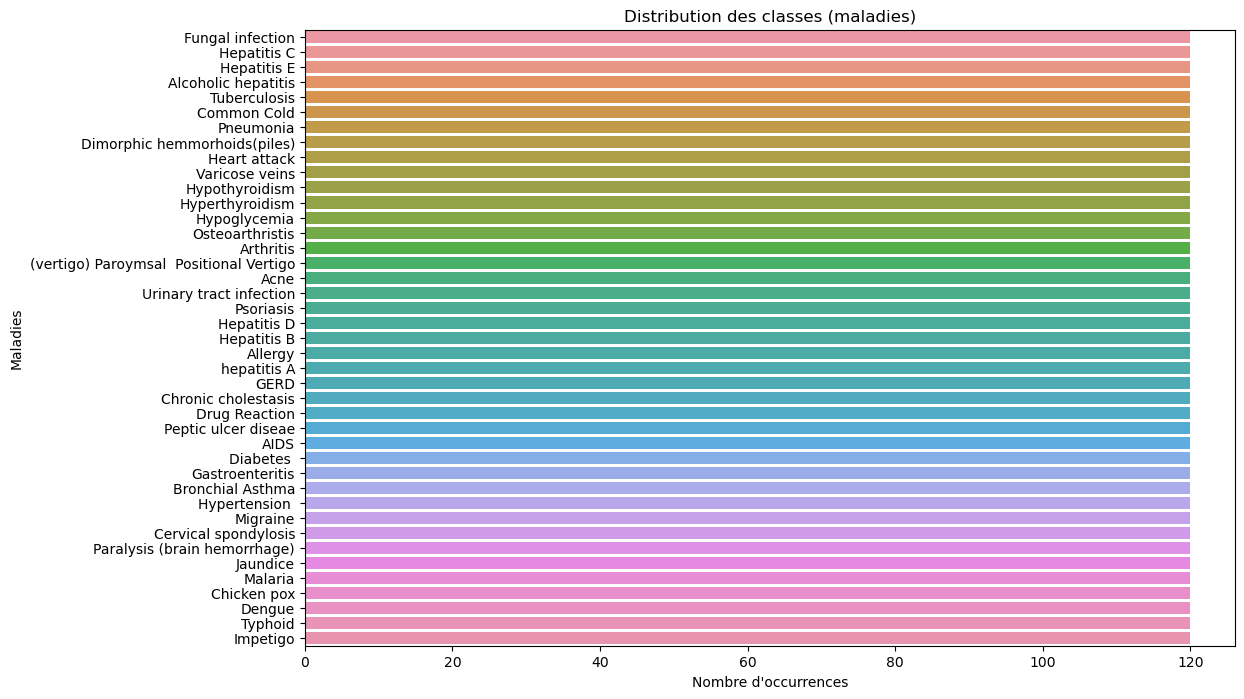

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la distribution des classes sous forme de graphique
plt.figure(figsize=(12, 8))
sns.countplot(y=y, order=y.value_counts().index)
plt.title("Distribution des classes (maladies)")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Maladies")
plt.show()

Cela affichera un graphique montrant que toutes les classes ont la même hauteur (120 occurrences).



3. Utiliser la validation croisée

In [12]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5 folds de validation croisée
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} (± {scores.std():.4f})")

SVC Cross-Validation Accuracy: 1.0000 (± 0.0000)
RandomForest Cross-Validation Accuracy: 1.0000 (± 0.0000)
GradientBoosting Cross-Validation Accuracy: 1.0000 (± 0.0000)
KNeighbors Cross-Validation Accuracy: nan (± nan)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._

GaussianNB Cross-Validation Accuracy: 1.0000 (± 0.0000)


4. Tester sur un jeu de validation indépendant

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Supposons que vous avez déjà vos données X et y
# X = ...  # Vos caractéristiques (un tableau NumPy ou une DataFrame Pandas)
# y = ...  # Vos étiquettes (un tableau NumPy ou une série Pandas)

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertir les données en tableaux NumPy contigus
X_train = np.ascontiguousarray(X_train)
X_val = np.ascontiguousarray(X_val)
X_test = np.ascontiguousarray(X_test)

# Créer un dictionnaire pour stocker les modèles
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB()
}

# Entraîner et évaluer sur le jeu de validation
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Faire des prédictions sur le jeu de validation
    predictions = model.predict(X_val)

    # Calculer la précision
    accuracy = accuracy_score(y_val, predictions)
    print(f"{model_name} Validation Accuracy: {accuracy:.4f}")

SVC Validation Accuracy: 1.0000
RandomForest Validation Accuracy: 1.0000
GradientBoosting Validation Accuracy: 1.0000
KNeighbors Validation Accuracy: 1.0000
GaussianNB Validation Accuracy: 1.0000


5. Analyser les caractéristiques

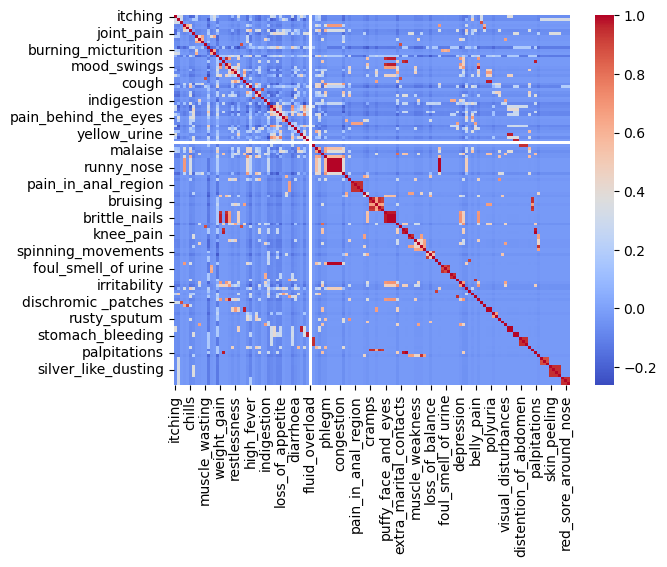

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

6. Réduire la dimensionnalité

In [25]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Désactiver le parallélisme OpenMP pour éviter les conflits
os.environ["OMP_NUM_THREADS"] = "1"

# Supposons que vous avez déjà vos données X et y
# X = ...  # Vos caractéristiques (un tableau NumPy ou une DataFrame Pandas)
# y = ...  # Vos étiquettes (un tableau NumPy ou une série Pandas)

# Appliquer PCA pour réduire la dimensionnalité
pca = PCA(n_components=50)  # Réduire à 50 composantes principales
X_pca = pca.fit_transform(X)

# Diviser les données réduites en ensembles d'entraînement et de test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Créer un dictionnaire pour stocker les modèles
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5, n_jobs=1),  # Désactiver le parallélisme
    'GaussianNB': GaussianNB()
}

# Entraîner et évaluer les modèles sur les données réduites
for model_name, model in models.items():
    try:
        model.fit(X_train_pca, y_train)
        predictions = model.predict(X_test_pca)
        accuracy = accuracy_score(y_test, predictions)
        print(f"{model_name} (PCA) Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"Erreur avec {model_name} : {e}")

SVC (PCA) Accuracy: 1.0000
RandomForest (PCA) Accuracy: 1.0000
GradientBoosting (PCA) Accuracy: 1.0000
Erreur avec KNeighbors : 'NoneType' object has no attribute 'split'
GaussianNB (PCA) Accuracy: 1.0000


7. Utiliser d'autres métriques

La précision n'est pas toujours la meilleure métrique, surtout si les classes sont déséquilibrées. Utilisez d'autres métriques comme la précision, le rappel, le F1-score ou la matrice de confusion.

In [26]:
from sklearn.metrics import classification_report

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions))

SVC Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      1.00      1.00        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00        31


KNeighbors Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      1.00      1.00        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00    

8. Vérifier les performances sur un jeu de test indépendant

In [27]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

SVC Test Accuracy: 1.0000
RandomForest Test Accuracy: 1.0000
GradientBoosting Test Accuracy: 1.0000
KNeighbors Test Accuracy: 1.0000
GaussianNB Test Accuracy: 1.0000


9. Visualiser les données

Visualisez vos données pour comprendre leur structure. Par exemple, utilisez une ACP pour réduire les données à 2 ou 3 dimensions et tracez-les.

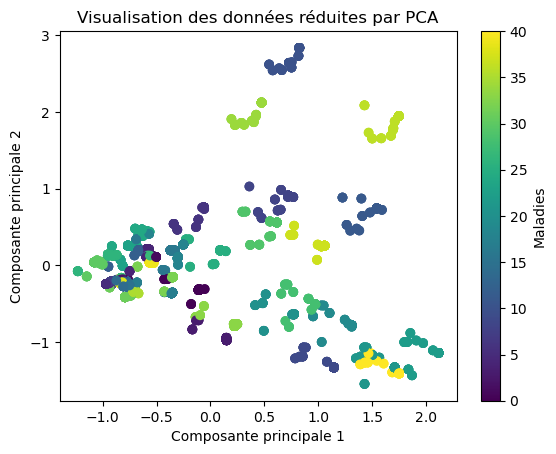

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encoder les noms des maladies en nombres
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Appliquer PCA pour réduire la dimensionnalité
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Tracer le graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_encoded, cmap='viridis')
plt.colorbar(label='Maladies')
plt.title("Visualisation des données réduites par PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

## Code final amélioré

Nombre de doublons dans X : 4616
Valeurs manquantes dans X : 0
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                1

GradientBoosting Cross-Validation Accuracy: 1.0000 (± 0.0000)
GradientBoosting Test Accuracy: 1.0000
GradientBoosting Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      1.00      1.00        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._

KNeighbors Cross-Validation Accuracy: nan (± nan)
KNeighbors Test Accuracy: 1.0000
KNeighbors Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      1.00      1.00        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00  

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 682               Pneumonia
3963              Pneumonia
3126          Hypertension 
4480               Migraine
3411        Gastroenteritis
               ...         
4426              Psoriasis
466     Peptic ulcer diseae
3092                 Dengue
3772       Fungal infection
860           Drug Reaction
Name: prognosis, Length: 3444, dtype: object

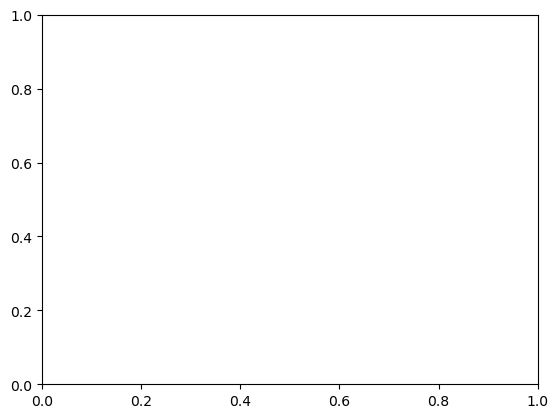

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supposons que vous avez déjà vos données X et y
# X = ...  # Vos caractéristiques (un tableau NumPy ou une DataFrame Pandas)
# y = ...  # Vos étiquettes (un tableau NumPy ou une série Pandas)

# Vérifier les doublons et les valeurs manquantes
print("Nombre de doublons dans X :", X.duplicated().sum())
print("Valeurs manquantes dans X :", X.isnull().sum().sum())

# Afficher la distribution des classes
print(pd.Series(y).value_counts())

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir X_train et X_test en tableaux C-contigus
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Créer un dictionnaire pour stocker les modèles
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB()
}

# Boucle pour entraîner, tester et afficher les résultats
for model_name, model in models.items():
    # Validation croisée
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} (± {scores.std():.4f})")

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Tester le modèle
    predictions = model.predict(X_test)

    # Calculer la précision
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

    # Afficher le rapport de classification
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions))

    # Afficher la matrice de confusion
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "=" * 40 + "\n")

# Visualiser les données avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.show()

In [ ]:
-----------------------------

# single prediction

In [31]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [32]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [33]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [34]:
# test 1:
#print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
#print("Actual Disease :", y_test[0])

# Convertir y_test en tableau NumPy
y_test = y_test.values  # ou y_test.to_numpy()

# Test 1
print("Predicted Disease :", svc.predict(X_test[0].reshape(1, -1)))
print("Actual Disease :", y_test[0])

Predicted Disease : ['Acne']
Actual Disease : Acne


In [35]:
# test 2:
#print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
#print("Actual Disease :", y_test[100])

print("Predicted Disease :", svc.predict(X_test[100].reshape(1, -1)))
print("Actual Disease :", y_test[100])

Predicted Disease : ['Hypertension ']
Actual Disease : Hypertension 


# Recommendation System and Prediction

# load database and use logic for recommendations

In [36]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [41]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [38]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) 
# itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1
# itching,skin_rash

Enter your symptoms.......itching,skin_rash


NameError: name 'get_predicted_value' is not defined

In [40]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

# Charger le modèle SVC (assurez-vous que le fichier 'svc.pkl' existe)
with open('svc.pkl', 'rb') as f:
    svc = pickle.load(f)

# Dictionnaire des symptômes
symptoms_dict = {
    'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4,
    'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10,
    'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15,
    'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20,
    'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25,
    'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31,
    'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36,
    'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42,
    'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46,
    'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51,
    'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56,
    'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60,
    'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66,
    'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71,
    'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75,
    'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80,
    'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85,
    'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89,
    'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93,
    'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98,
    'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102,
    'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107,
    'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111,
    'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115,
    'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118,
    'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122,
    'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127,
    'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131
}

# Liste des maladies
diseases_list = {
    15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction',
    33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma',
    23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)',
    28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A',
    19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis',
    36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)',
    18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia',
    31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne',
    38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'
}

# Fonction pour obtenir les détails de la maladie
def helper(dis):
    # Exemple de données (remplacez par vos propres données)
    description = {
        'Fungal infection': 'Description of Fungal infection...',
        'Allergy': 'Description of Allergy...',
        # Ajoutez les descriptions pour toutes les maladies
    }
    precautions = {
        'Fungal infection': ['Keep the affected area clean and dry.', 'Avoid sharing personal items like towels.'],
        'Allergy': ['Avoid allergens.', 'Take antihistamines as prescribed.'],
        # Ajoutez les précautions pour toutes les maladies
    }
    medications = {
        'Fungal infection': ['Antifungal cream', 'Oral antifungal medication'],
        'Allergy': ['Antihistamines', 'Decongestants'],
        # Ajoutez les médicaments pour toutes les maladies
    }
    diets = {
        'Fungal infection': ['Avoid sugary foods.', 'Eat more probiotics.'],
        'Allergy': ['Avoid allergenic foods.', 'Eat anti-inflammatory foods.'],
        # Ajoutez les régimes pour toutes les maladies
    }
    workout = {
        'Fungal infection': ['Light exercise to improve circulation.'],
        'Allergy': ['Yoga for stress relief.'],
        # Ajoutez les exercices pour toutes les maladies
    }

    desc = description.get(dis, "No description available.")
    pre = precautions.get(dis, ["No precautions available."])
    med = medications.get(dis, ["No medications available."])
    die = diets.get(dis, ["No diets available."])
    wrkout = workout.get(dis, ["No workouts available."])

    return desc, pre, med, die, wrkout

# Fonction pour prédire la maladie
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:  # Vérifier si le symptôme existe dans le dictionnaire
            input_vector[symptoms_dict[item]] = 1
    predicted_index = svc.predict([input_vector])[0]  # Obtenir l'index prédit
    return diseases_list.get(predicted_index, "Unknown Disease")  # Retourner la maladie correspondante

# Test 1
symptoms = input("Enter your symptoms (comma-separated): ")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]

# Obtenir la maladie prédite
predicted_disease = get_predicted_value(user_symptoms)

# Afficher les détails de la maladie
desc, pre, med, die, wrkout = helper(predicted_disease)

print("\n=================predicted disease============")
print(predicted_disease)
print("\n=================description==================")
print(desc)
print("\n=================precautions==================")
for i, p_i in enumerate(pre, start=1):
    print(f"{i}: {p_i}")

print("\n=================medications==================")
for i, m_i in enumerate(med, start=len(pre) + 1):
    print(f"{i}: {m_i}")

print("\n=================workout==================")
for i, w_i in enumerate(wrkout, start=len(pre) + len(med) + 1):
    print(f"{i}: {w_i}")

print("\n=================diets==================")
for i, d_i in enumerate(die, start=len(pre) + len(med) + len(wrkout) + 1):
    print(f"{i}: {d_i}")

Enter your symptoms (comma-separated): itching,skin_rash

=================predicted disease============
Unknown Disease

=================description==================
No description available.

=================precautions==================
1: No precautions available.

=================medications==================
2: No medications available.

=================workout==================
3: No workouts available.

=================diets==================
4: No diets available.


In [41]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms.......itching,skin_rash
=================predicted disease============
Unknown Disease
=================description==================
No description available.
=================precautions==================
1 :  N
2 :  o
3 :   
4 :  p
5 :  r
6 :  e
7 :  c
8 :  a
9 :  u
10 :  t
11 :  i
12 :  o
13 :  n
14 :  s
15 :   
16 :  a
17 :  v
18 :  a
19 :  i
20 :  l
21 :  a
22 :  b
23 :  l
24 :  e
25 :  .
=================medications==================
26 :  No medications available.
=================workout==================
27 :  No workouts available.
=================diets==================
28 :  No diets available.


In [31]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.3.0
